In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
original_data= pd.read_csv("creditcard.csv")
original_data.head()
print("Total number of transactions",original_data.shape[0])
print("Total  features",original_data.shape[1])

Total number of transactions 284807
Total  features 31


Among 31 features,v1 to v28 are pca observations so let's consider 3 main features
1)time
2)amount
3)Class

In [3]:
original_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Number of fraud transactions are very less(492) compared to valid transactions(2,84,315).

In [4]:
valid_data = original_data[original_data['Class']==0]
fraud_data = original_data[original_data['Class']==1]
fraud_data['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Maximum amount in fraud transactions is 2125

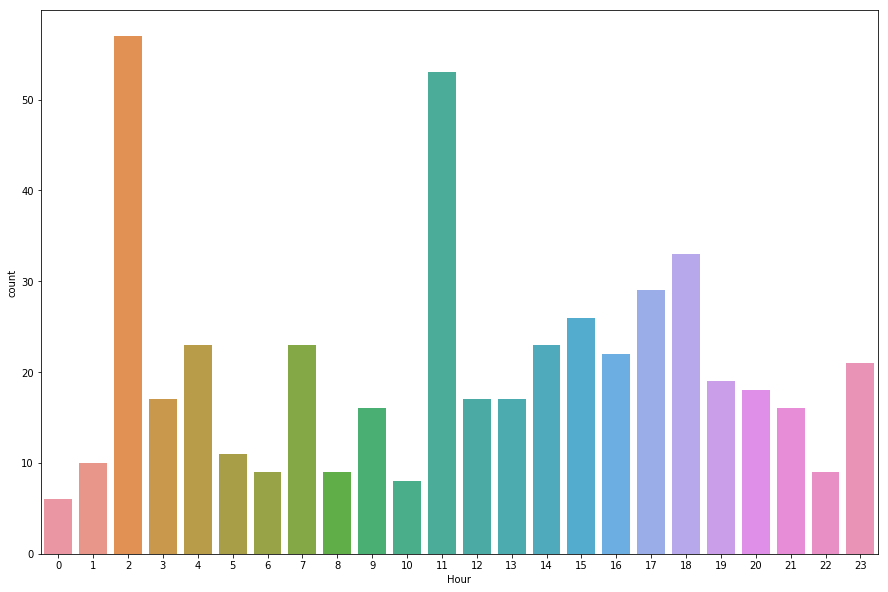

In [5]:
data_analysis = original_data[['Time', 'Amount', 'Class']].copy()
time_analysis = fraud_data[['Time', 'Amount', 'Class']].copy()
def convertHour(second):
    return dt.datetime.utcfromtimestamp(second)

time_analysis['DateWithTime']=time_analysis.Time.apply(convertHour)
time_analysis['Hour']=time_analysis.DateWithTime.dt.hour
plt.figure(figsize=(15,10))
sns.countplot(x='Hour', data=time_analysis)
plt.show()


From graph we can say that in 2nd hour and 11th hour maximum fraud transactions occured.

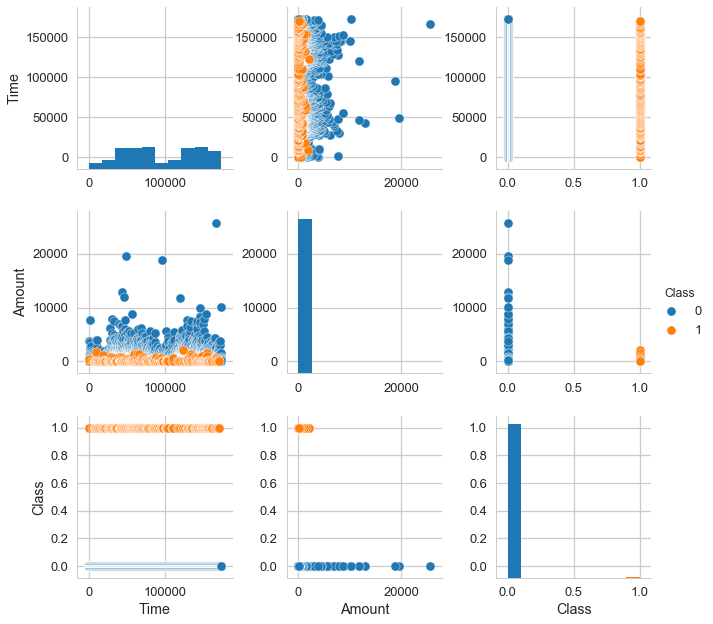

In [6]:
sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style("whitegrid");
sns.pairplot(data_analysis, hue="Class",size=3);

from pairplot
1)amount of class 0(fraud transactions) are very less compare to amount of valid transactions


# All over conclusion
1)from time feature analysis, we can conclude more traffic of fraud transactions hours(2 and 11).
2)from amount,we are not getting much details but we can say fraud transactions are of very less amount(max amount is 2125)
3)from class feature,it is vey clear that fraud transactions are very less compare to valid transactions

# Task 2

In [56]:
data= original_data
data_copy=original_data
sample_index = np.random.choice(284807,replace=False, size=100)  #taking sample of 100 trans and 2 trans fraud
sample_data = original_data.iloc[sample_index]
sample_data['Class'].value_counts()

0    98
1     2
Name: Class, dtype: int64

In [57]:
length_of_vector = pd.DataFrame(np.sqrt(np.square(data_copy).sum(axis = 1)))          #284807 * 1
length_of_vector_sample=pd.DataFrame(np.sqrt(np.square(sample_data).sum(axis = 1)))   #100 * 1
dot_product_length= length_of_vector_sample.dot(length_of_vector.T)                   #100 *  284807  matrix
#print(dot_product_length.shape)
dot_product_matrix = sample_data.dot(data_copy.T)                                     #100 * 284807 matrix
#print(dot_product_matrix.shape)
similarty_values= dot_product_matrix.divide(dot_product_length,axis =0)
similarty_values=similarty_values.round(12)
similarty_values_final = similarty_values.applymap(lambda z:math.acos(z)) # final result matrix as per formula given

In [58]:

for item in range(0,100):
    row=pd.DataFrame(similarty_values_final.iloc[item])    
    top_ten=row.sort_values(row.columns[0],ascending=True).head(10)  
   # print(top_ten)
    print("------------------------------------------------------------------------------------")
    print("Given transaction ",top_ten.index[0],"Class :",data.get_value(col="Class",index=top_ten.index[0]))
    for sim in range(0,10):   
        print(" #Transaction id:",top_ten.index[sim],"#Class:" , data.get_value(col="Class",index=top_ten.index[sim]), "#Similarity:" ,"%.5f" %top_ten.get_value(col=top_ten.columns[0],index=top_ten.index[sim]))


------------------------------------------------------------------------------------
Given transaction  135858 Class : 0
 #Transaction id: 135858 #Class: 0 #Similarity: 0.00000
 #Transaction id: 115480 #Class: 0 #Similarity: 0.00002
 #Transaction id: 113250 #Class: 0 #Similarity: 0.00002
 #Transaction id: 115976 #Class: 0 #Similarity: 0.00002
 #Transaction id: 117128 #Class: 0 #Similarity: 0.00003
 #Transaction id: 115066 #Class: 0 #Similarity: 0.00003
 #Transaction id: 110029 #Class: 0 #Similarity: 0.00003
 #Transaction id: 127709 #Class: 0 #Similarity: 0.00003
 #Transaction id: 136686 #Class: 0 #Similarity: 0.00003
 #Transaction id: 105252 #Class: 0 #Similarity: 0.00003
------------------------------------------------------------------------------------
Given transaction  147940 Class : 0
 #Transaction id: 147940 #Class: 0 #Similarity: 0.00000
 #Transaction id: 200686 #Class: 0 #Similarity: 0.00002
 #Transaction id: 174968 #Class: 0 #Similarity: 0.00003
 #Transaction id: 183072 #Clas

------------------------------------------------------------------------------------
Given transaction  137420 Class : 0
 #Transaction id: 137420 #Class: 0 #Similarity: 0.00000
 #Transaction id: 144703 #Class: 0 #Similarity: 0.00001
 #Transaction id: 124822 #Class: 0 #Similarity: 0.00002
 #Transaction id: 110389 #Class: 0 #Similarity: 0.00002
 #Transaction id: 141046 #Class: 0 #Similarity: 0.00002
 #Transaction id: 137343 #Class: 0 #Similarity: 0.00002
 #Transaction id: 141531 #Class: 0 #Similarity: 0.00002
 #Transaction id: 72969 #Class: 0 #Similarity: 0.00002
 #Transaction id: 134955 #Class: 0 #Similarity: 0.00003
 #Transaction id: 141602 #Class: 0 #Similarity: 0.00003
------------------------------------------------------------------------------------
Given transaction  28881 Class : 0
 #Transaction id: 28881 #Class: 0 #Similarity: 0.00000
 #Transaction id: 94365 #Class: 0 #Similarity: 0.00005
 #Transaction id: 70061 #Class: 0 #Similarity: 0.00005
 #Transaction id: 19205 #Class: 0 #

------------------------------------------------------------------------------------
Given transaction  128858 Class : 0
 #Transaction id: 128858 #Class: 0 #Similarity: 0.00000
 #Transaction id: 136794 #Class: 0 #Similarity: 0.00001
 #Transaction id: 82025 #Class: 0 #Similarity: 0.00002
 #Transaction id: 99155 #Class: 0 #Similarity: 0.00002
 #Transaction id: 113160 #Class: 0 #Similarity: 0.00002
 #Transaction id: 135067 #Class: 0 #Similarity: 0.00002
 #Transaction id: 197968 #Class: 0 #Similarity: 0.00003
 #Transaction id: 112209 #Class: 0 #Similarity: 0.00003
 #Transaction id: 264041 #Class: 0 #Similarity: 0.00003
 #Transaction id: 269944 #Class: 0 #Similarity: 0.00003
------------------------------------------------------------------------------------
Given transaction  257994 Class : 0
 #Transaction id: 257994 #Class: 0 #Similarity: 0.00000
 #Transaction id: 224541 #Class: 0 #Similarity: 0.00000
 #Transaction id: 211498 #Class: 0 #Similarity: 0.00001
 #Transaction id: 253637 #Class:

------------------------------------------------------------------------------------
Given transaction  157908 Class : 0
 #Transaction id: 157908 #Class: 0 #Similarity: 0.00000
 #Transaction id: 156678 #Class: 0 #Similarity: 0.00003
 #Transaction id: 151836 #Class: 0 #Similarity: 0.00003
 #Transaction id: 153845 #Class: 0 #Similarity: 0.00004
 #Transaction id: 181666 #Class: 0 #Similarity: 0.00004
 #Transaction id: 168400 #Class: 0 #Similarity: 0.00004
 #Transaction id: 173524 #Class: 0 #Similarity: 0.00004
 #Transaction id: 238682 #Class: 0 #Similarity: 0.00004
 #Transaction id: 149658 #Class: 0 #Similarity: 0.00004
 #Transaction id: 167620 #Class: 0 #Similarity: 0.00004
------------------------------------------------------------------------------------
Given transaction  254434 Class : 0
 #Transaction id: 254434 #Class: 0 #Similarity: 0.00000
 #Transaction id: 260467 #Class: 0 #Similarity: 0.00003
 #Transaction id: 158996 #Class: 0 #Similarity: 0.00003
 #Transaction id: 209968 #Clas

------------------------------------------------------------------------------------
Given transaction  78940 Class : 0
 #Transaction id: 78940 #Class: 0 #Similarity: 0.00000
 #Transaction id: 107093 #Class: 0 #Similarity: 0.00003
 #Transaction id: 115971 #Class: 0 #Similarity: 0.00003
 #Transaction id: 97183 #Class: 0 #Similarity: 0.00003
 #Transaction id: 53903 #Class: 0 #Similarity: 0.00003
 #Transaction id: 83311 #Class: 0 #Similarity: 0.00003
 #Transaction id: 65999 #Class: 0 #Similarity: 0.00003
 #Transaction id: 82114 #Class: 0 #Similarity: 0.00003
 #Transaction id: 141209 #Class: 0 #Similarity: 0.00003
 #Transaction id: 117862 #Class: 0 #Similarity: 0.00003
------------------------------------------------------------------------------------
Given transaction  251638 Class : 0
 #Transaction id: 251638 #Class: 0 #Similarity: 0.00000
 #Transaction id: 227856 #Class: 0 #Similarity: 0.00001
 #Transaction id: 175040 #Class: 0 #Similarity: 0.00001
 #Transaction id: 253150 #Class: 0 #S

------------------------------------------------------------------------------------
Given transaction  159741 Class : 0
 #Transaction id: 159741 #Class: 0 #Similarity: 0.00000
 #Transaction id: 240349 #Class: 0 #Similarity: 0.00002
 #Transaction id: 167575 #Class: 0 #Similarity: 0.00002
 #Transaction id: 167509 #Class: 0 #Similarity: 0.00002
 #Transaction id: 237203 #Class: 0 #Similarity: 0.00002
 #Transaction id: 200143 #Class: 0 #Similarity: 0.00002
 #Transaction id: 197856 #Class: 0 #Similarity: 0.00002
 #Transaction id: 229930 #Class: 0 #Similarity: 0.00002
 #Transaction id: 275500 #Class: 0 #Similarity: 0.00002
 #Transaction id: 240416 #Class: 0 #Similarity: 0.00002
------------------------------------------------------------------------------------
Given transaction  40426 Class : 0
 #Transaction id: 40426 #Class: 0 #Similarity: 0.00000
 #Transaction id: 41465 #Class: 0 #Similarity: 0.00004
 #Transaction id: 30030 #Class: 0 #Similarity: 0.00004
 #Transaction id: 31127 #Class: 0 

------------------------------------------------------------------------------------
Given transaction  77270 Class : 0
 #Transaction id: 77270 #Class: 0 #Similarity: 0.00000
 #Transaction id: 142725 #Class: 0 #Similarity: 0.00005
 #Transaction id: 54418 #Class: 0 #Similarity: 0.00005
 #Transaction id: 41310 #Class: 0 #Similarity: 0.00005
 #Transaction id: 203267 #Class: 0 #Similarity: 0.00005
 #Transaction id: 55275 #Class: 0 #Similarity: 0.00006
 #Transaction id: 184972 #Class: 0 #Similarity: 0.00006
 #Transaction id: 191215 #Class: 0 #Similarity: 0.00006
 #Transaction id: 51973 #Class: 0 #Similarity: 0.00006
 #Transaction id: 161899 #Class: 0 #Similarity: 0.00006
------------------------------------------------------------------------------------
Given transaction  284643 Class : 0
 #Transaction id: 284643 #Class: 0 #Similarity: 0.00000
 #Transaction id: 284612 #Class: 0 #Similarity: 0.00001
 #Transaction id: 250907 #Class: 0 #Similarity: 0.00001
 #Transaction id: 222332 #Class: 0 #